In [1]:
%load_ext autotime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import warnings
warnings.filterwarnings("ignore")

time: 1.12 s (started: 2022-10-13 14:16:43 +08:00)


In [2]:
# reopen the pickle file from previous notebook
# recall that x is the fundamentals data and y is the price data
x = pickle.load(open('./data/02_fundamentals.pkl', 'rb'))
y = pickle.load(open('./data/02_pricedata.pkl', 'rb'))

time: 31 ms (started: 2022-10-13 14:16:44 +08:00)


In [3]:
print(x.shape)
print(y.shape)

(29650, 74)
(29650, 7)
time: 0 ns (started: 2022-10-13 14:16:44 +08:00)


In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 74 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Ticker                                           29650 non-null  object        
 1   Report Date                                      29650 non-null  datetime64[ns]
 2   SimFinId                                         29650 non-null  int64         
 3   Currency                                         29650 non-null  object        
 4   Fiscal Year                                      29650 non-null  int64         
 5   Fiscal Period_x                                  29650 non-null  object        
 6   Publish Date                                     29650 non-null  datetime64[ns]
 7   Restated Date_x                                  29650 non-null  datetime64[ns]
 8   Shares (Basic)_x                    

As there are still some null values, we would need to fix these as any feature engineered ratio could give us an error. Let's fill these null values with zero first.

In [5]:
x = x.fillna(0)

time: 547 ms (started: 2022-10-13 14:16:44 +08:00)


In [6]:
# total of 29650 rows
y

,Ticker,Date1,Open1,Volume1,Date2,Open2,Volume2
0,A,2016-10-31,43.33,1556762.0,2017-10-31,67.74,1609938.0
1,A,2017-01-31,48.04,2552612.0,2018-01-31,73.77,1949108.0
2,A,2017-04-30,55.50,1897018.0,2018-04-30,66.49,2277705.0
3,A,2017-07-31,60.32,1038744.0,2018-07-31,64.93,2539265.0
4,A,2017-10-31,67.74,1609938.0,2018-10-31,64.35,3820987.0
...,...,...,...,...,...,...,...
29645,ZYXI,2019-09-30,8.65,177336.0,2020-09-29,15.33,382097.0
29646,ZYXI,2019-12-31,7.13,129247.0,2020-12-30,12.13,487832.0
29647,ZYXI,2020-03-31,9.71,308449.0,2021-03-31,13.60,423240.0
29648,ZYXI,2020-06-30,20.95,1160230.0,2021-06-30,14.13,144577.0


time: 16 ms (started: 2022-10-13 14:16:45 +08:00)


## Add in 3 new columns
- Market cap: Diluted shares x Open price at that date
- EV: Market cap + LT Debt + ST Debt - Cash
- EBIT: Net Income - Interest Expense - Net Income Tax (Expense) Benefit

In [7]:
# Add in three new columns
# Market Cap
x['Market Cap'] = x['Shares (Diluted)_x'] * y['Open1']

# Enterprise Value
x['EV'] = x['Market Cap'] + x['Long Term Debt'] + x['Short Term Debt'] - x['Cash, Cash Equivalents & Short Term Investments']

# EBIT = Net Income + Interest + Taxes
x['EBIT'] = x['Net Income'] + x['Interest Expense, Net'] - x['Income Tax (Expense) Benefit, Net']

time: 0 ns (started: 2022-10-13 14:16:45 +08:00)


In [8]:
x.head()

,Ticker,Report Date,SimFinId,Currency,Fiscal Year,Fiscal Period_x,Publish Date,Restated Date_x,Shares (Basic)_x,Shares (Diluted)_x,...,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,Market Cap,EV,EBIT
0,A,2016-10-31,45846,USD,2016,Q4,2016-12-20,2018-12-20,324000000.0,328000000.0,...,-26000000.0,-78000000.0,-38000000.0,27000000.0,-43000000.0,-56000000.0,90000000,1.421224e+10,1.382724e+10,135000000.0
1,A,2017-01-31,45846,USD,2017,Q1,2017-03-08,2018-03-06,322000000.0,326000000.0,...,-69000000.0,-101000000.0,-42000000.0,89000000.0,-93000000.0,-58000000.0,-48000000,1.566104e+10,1.541204e+10,177000000.0
2,A,2017-04-30,45846,USD,2017,Q2,2017-06-06,2018-05-31,321000000.0,325000000.0,...,0.0,-43000000.0,-43000000.0,52000000.0,-75000000.0,-67000000.0,148000000,1.803750e+10,1.769150e+10,176000000.0
3,A,2017-07-31,45846,USD,2017,Q3,2017-09-06,2018-08-30,321000000.0,326000000.0,...,-57000000.0,-101000000.0,-42000000.0,39000000.0,32000000.0,29000000.0,174000000,1.966432e+10,1.918232e+10,180000000.0
4,A,2017-10-31,45846,USD,2017,Q4,2017-12-21,2018-12-20,324000000.0,327000000.0,...,0.0,-60000000.0,-43000000.0,-70000000.0,8000000.0,-106000000.0,115000000,2.215098e+10,2.148398e+10,213000000.0


time: 16 ms (started: 2022-10-13 14:16:45 +08:00)


## Define function to develop financial ratios

In [9]:
# Create a function to feature engineer many different financial ratios
# Takes in original fundamental dataframe then output all the ratio

def getRatios(df):    
    # Create a new dataframe to copy ratios into
    df1 = pd.DataFrame()
    
    # Liquidity Ratios -----------------------------------------------
    # Current Ratio
    df1['CR'] = df['Total Current Assets']/df['Total Current Liabilities']
    
    # Acid Test Ratio/Quick Ratio
    df1['Acid'] = (df['Total Current Assets'] - df['Inventories'])/df['Total Current Liabilities']
    
    # Cash Ratio
    df1['CashRatio'] = df['Cash, Cash Equivalents & Short Term Investments']/df['Total Current Liabilities']
    
    
    # Turnover Ratios -----------------------------------------------
    # Inventory Turnover Ratio
    df1['InvTO'] = -df['Cost of Revenue']/-df['Inventories']
    
    # Asset Turnover
    df1['AssetTurnover'] = df['Revenue']/ df['Property, Plant & Equipment, Net']
    
    # Net Working Capital Turnover
    df1['NWC_TO'] = df['Revenue']/ (df['Total Current Assets'] - df['Total Current Liabilities'])

    
    # Operating Profitability Ratios -----------------------------------------------
    # Profit Margin
    df1['PM'] = df['Net Income']/ df['Revenue']
    
    # Gross Profit Margin
    df1['GPM'] = df['Gross Profit']/ df['Revenue']
    
    # Return on Equity
    df1['ROE'] = df['Net Income']/ df['Total Equity']

    # Return on Capital Employed
    df1['ROCE'] = df['EBIT']/ (df['Total Assets'] - df['Total Current Liabilities'])
    

    # Valuation Ratios -----------------------------------------------
    # Price to earnings
    df1['PE'] = df['Market Cap']/df['Net Income']

    # Price to book
    df1['PB'] = df['Market Cap']/df['Total Equity']

    # Price to sales
    df1['PS'] = df['Market Cap']/df['Revenue']
    
    # EV/EBIT
    df1['EV_EBIT'] = df['EV']/df['EBIT']
    
    
    # Financial Risk Ratios -----------------------------------------------
    # Debt/Equity
    df1['DE'] = df['Total Liabilities']/ df['Total Equity']

    # Debt Ratio
    df1['DebtRatio'] = df['Total Assets']/ df['Total Liabilities']

    # Interest Coverage Ratio
    df1['ICR'] = df['Operating Income (Loss)']/ -df['Interest Expense, Net']

    # Equity over liabilities
    df1['Equity_Liab'] = df['Total Equity']/ df['Total Liabilities']
    
    
    # Stability Ratios -----------------------------------------------
    # Working Capital Ratio (CA/CL)
    df1['WorkingCap'] = df['Total Current Assets']/ df['Total Current Liabilities']
     
    # Operating Income over (Net working capital + Fixed assets)
    df1['OI_NWCFA'] = df['Operating Income (Loss)']/\
    (df['Total Current Assets'] - df['Total Current Liabilities'] + df['Property, Plant & Equipment, Net'])
    
    # Working Capital over total assets
    df1['WC_TA'] = (df['Total Current Assets'] - df['Total Current Liabilities'])/ df['Total Assets']

    # Retained earnings over total assets
    df1['RE_TA'] = df['Retained Earnings']/ df['Total Assets']

    # EBIT over total assets
    df1['EBIT_TA'] = df['EBIT']/ df['Total Assets']

    return df1

time: 0 ns (started: 2022-10-13 14:16:45 +08:00)


In [10]:
X = getRatios(x)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CR,29650.0,2.910291,4.777569,0.000000e+00,1.147959,1.781993,3.022986,166.871694
Acid,29650.0,2.471153,4.750641,0.000000e+00,0.850938,1.346451,2.376559,166.871694
CashRatio,29650.0,1.648592,4.299935,0.000000e+00,0.164223,0.495299,1.405674,137.646154
InvTO,27047.0,NaN,NaN,-inf,NaN,-1.859095,-0.866870,inf
AssetTurnover,29559.0,NaN,NaN,-inf,0.476776,1.395188,3.076151,inf
NWC_TO,29650.0,inf,NaN,-1.393013e+04,0.047707,0.687784,1.648121,inf
PM,29648.0,NaN,NaN,-inf,-0.066808,0.041981,0.113950,inf
GPM,28821.0,NaN,NaN,-inf,0.213944,0.384302,0.603427,inf
ROE,29650.0,-inf,NaN,-inf,-0.027306,0.018032,0.048841,4476.181818
ROCE,29650.0,-0.047858,16.489767,-2.643250e+03,-0.019238,0.007438,0.029267,836.262610


time: 78 ms (started: 2022-10-13 14:16:45 +08:00)


In [11]:
def fixRatios(df):
    '''
    Takes in original df, edits it to have the distributions clipped.
    The distribution clippings are done manually with human judgement based on the information.
    This is like removing outliers.
    '''
    df['CR'].clip(0, 30, inplace=True)
    df['Acid'].clip(0, 30, inplace=True)
    df['CashRatio'].clip(0, 10, inplace=True)
    df['InvTO'].clip(0, 10, inplace=True)
    df['AssetTurnover'].clip(-2000, 2000, inplace=True)
    df['NWC_TO'].clip(0, 5, inplace=True)
    df['PM'].clip(0, 1, inplace=True)
    df['GPM'].clip(0, 1, inplace=True)
    df['ROE'].clip(-5, 5, inplace=True)
    df['ROCE'].clip(-2, 2, inplace=True)
    df['PE'].clip(-1000, 1000, inplace=True)
    df['PB'].clip(-50, 100, inplace=True) 
    df['PS'].clip(0, 500, inplace=True)
    df['EV_EBIT'].clip(-500, 500, inplace=True)
    df['DE'].clip(0, 100, inplace=True)
    df['DebtRatio'].clip(0, 50, inplace=True)  
    df['ICR'].clip(-600, 600, inplace=True)
    df['Equity_Liab'].clip(-2, 20, inplace=True)
    df['WorkingCap'].clip(0, 30, inplace=True)  
    df['OI_NWCFA'].clip(-5, 5, inplace=True)
    df['WC_TA'].clip(-1.5, 2, inplace=True)
    df['RE_TA'].clip(-20, 2, inplace=True)
    df['EBIT_TA'].clip(-2, 1, inplace=True)

    df.fillna(0, inplace=True)
    
    return df

time: 0 ns (started: 2022-10-13 14:16:45 +08:00)


In [12]:
fixRatios(X).describe().T

,count,mean,std,min,25%,50%,75%,max
CR,29650.0,2.812459,3.457635,0.0,1.147959,1.781993,3.022986,30.000000
Acid,29650.0,2.374796,3.422952,0.0,0.850938,1.346451,2.376559,30.000000
CashRatio,29650.0,1.387396,2.227334,0.0,0.164223,0.495299,1.405674,10.000000
InvTO,29650.0,0.038146,0.580272,0.0,0.000000,0.000000,0.000000,10.000000
AssetTurnover,29650.0,26.575301,215.006145,-2000.0,0.469318,1.387328,3.065551,2000.000000
NWC_TO,29650.0,1.219424,1.472622,0.0,0.047707,0.687784,1.648121,5.000000
PM,29650.0,0.088736,0.146704,0.0,0.000000,0.041977,0.113946,1.000000
GPM,29650.0,0.398068,0.262434,0.0,0.198486,0.374539,0.597438,1.000000
ROE,29650.0,-0.008901,0.498676,-5.0,-0.027306,0.018032,0.048841,5.000000
ROCE,29650.0,-0.012180,0.183380,-2.0,-0.019238,0.007438,0.029267,2.000000


time: 78 ms (started: 2022-10-13 14:16:45 +08:00)


## Feature engineer y dataframe

In [13]:
# Create function to calculate the stock performance

def getReturns(df):
    '''
    Takes in df, which has the stock prices and respective dates
    Returns a DataFrame df1 containing the ticker and the relative change in price
    '''
    df1=pd.DataFrame()
    df1["Ticker"] = df["Ticker"]
    df1["Returns"] = np.where(df['Open2'].isnull(), None, (df["Open2"]-df["Open1"]) / df["Open1"])
    
    return df1

time: 0 ns (started: 2022-10-13 14:16:45 +08:00)


In [14]:
y = getReturns(y)

time: 0 ns (started: 2022-10-13 14:16:45 +08:00)


In [15]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ticker   29650 non-null  object
 1   Returns  29650 non-null  object
dtypes: object(2)
memory usage: 463.4+ KB
time: 0 ns (started: 2022-10-13 14:16:45 +08:00)


## Visualisation of the ratios distribution

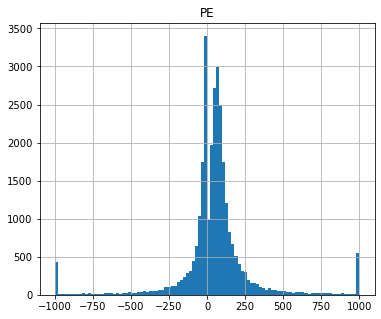

time: 219 ms (started: 2022-10-13 14:16:45 +08:00)


In [16]:
# Visualise one of the distribution, in this case the P/E ratio
# Try different numbers 0-22 since we have 23 different ratios
k = X.keys()[10]
X[k].hist(bins=100, figsize=(6,5))
plt.title(k);

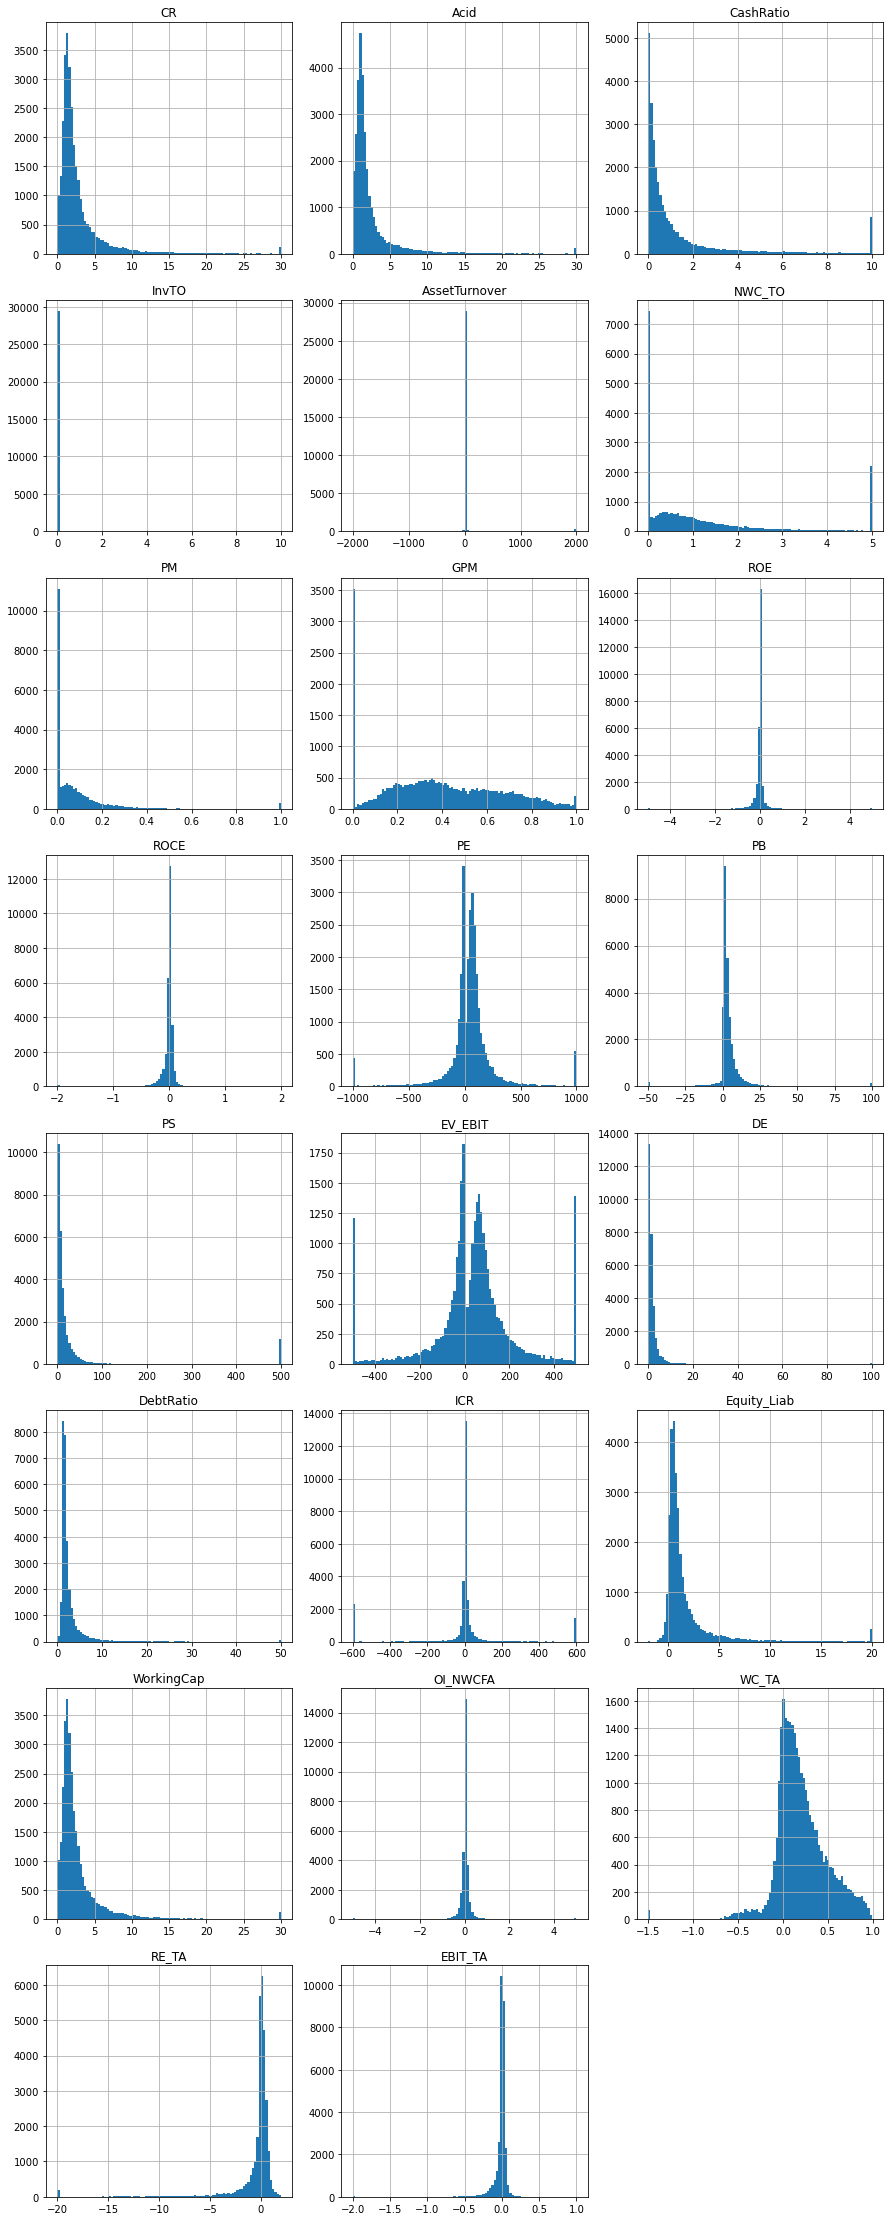

time: 4.08 s (started: 2022-10-13 14:16:46 +08:00)


In [17]:
# Make a 3x8 plot of all of the ratio distributions
cols, rows = 3, 8
plt.figure(figsize=(5*cols, 5*rows))

# plot for 23 ratios
for i in range(len(X.columns)):
    plt.subplot(rows, cols, i+1)
    k = X.keys()[i]
    X[k].hist(bins=100)
    plt.title(k);

Data does not seem to have good distribution. Try using PowerTransformer to get good distributions and to make data more Gaussian-like.

This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

In [18]:
from sklearn.preprocessing import PowerTransformer

time: 109 ms (started: 2022-10-13 14:16:50 +08:00)


In [19]:
# There are a total of 23 features
X.columns

Index(['CR', 'Acid', 'CashRatio', 'InvTO', 'AssetTurnover', 'NWC_TO', 'PM',
       'GPM', 'ROE', 'ROCE', 'PE', 'PB', 'PS', 'EV_EBIT', 'DE', 'DebtRatio',
       'ICR', 'Equity_Liab', 'WorkingCap', 'OI_NWCFA', 'WC_TA', 'RE_TA',
       'EBIT_TA'],
      dtype='object')

time: 0 ns (started: 2022-10-13 14:16:50 +08:00)


In [20]:
# Instantiate the PowerTransformer, then fit and transform the data
transformer = PowerTransformer()
X_transformed = pd.DataFrame(transformer.fit_transform(X), columns=X.columns)

time: 484 ms (started: 2022-10-13 14:16:50 +08:00)


In [21]:
# Ratios have been transformed to have a more Gaussian-like distribution
X_transformed

,CR,Acid,CashRatio,InvTO,AssetTurnover,NWC_TO,PM,GPM,ROE,ROCE,...,EV_EBIT,DE,DebtRatio,ICR,Equity_Liab,WorkingCap,OI_NWCFA,WC_TA,RE_TA,EBIT_TA
0,0.904214,0.982948,1.232045,-0.085555,-0.086774,-0.375676,0.804903,0.553581,0.072196,0.163711,...,0.305181,-0.269526,0.299047,0.039461,0.271010,0.904214,0.043193,0.487407,1.472865,0.268700
1,0.735592,0.823725,1.113304,-0.085555,-0.087656,-0.365893,1.157784,0.584363,0.091093,0.199068,...,0.219500,-0.275029,0.304858,0.046534,0.276344,0.735592,0.061792,0.409550,-0.165967,0.328713
2,0.684993,0.787058,1.096405,-0.085555,-0.087668,-0.361651,1.098189,0.581709,0.087907,0.197283,...,0.294536,-0.273311,0.303042,0.049123,0.274678,0.684993,0.055351,0.418680,-0.155501,0.322548
3,0.692046,0.796833,1.116025,-0.085555,-0.088318,-0.389733,1.155384,0.573953,0.088846,0.196555,...,0.328366,-0.319730,0.352650,0.059316,0.320236,0.692046,0.048989,0.445640,-0.133590,0.320602
4,0.722111,0.829020,1.135796,-0.085555,-0.088192,-0.381923,1.098505,0.606200,0.086141,0.219255,...,0.296458,-0.377918,0.416472,0.071540,0.378920,0.722111,0.060241,0.486501,-0.112533,0.361379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29645,0.985168,1.093722,1.291080,-0.085555,0.008100,0.171828,1.249651,1.480863,0.262269,0.743891,...,0.432127,-0.699637,0.805105,-2.315824,0.740164,0.985168,0.265299,1.306058,0.696901,1.298540
29646,1.044011,1.155422,1.306144,-0.085555,0.016716,0.149242,1.436288,1.456341,0.314614,0.956106,...,0.114300,-0.811466,0.955827,3.211759,0.883434,1.044011,0.338858,1.464191,0.797155,1.705221
29647,1.060281,1.137961,1.253957,-0.085555,-0.001596,0.096547,1.363793,1.380503,0.266274,0.552143,...,0.533893,-0.834180,0.987517,3.211759,0.913890,1.060281,0.165958,1.404336,0.825694,0.949629
29648,1.191512,1.225812,1.331761,-0.085555,-0.000343,0.142427,1.152234,1.419928,0.237847,0.794549,...,0.802616,-0.943040,1.144686,3.211759,1.067056,1.191512,0.254653,1.587476,0.898152,1.428094


time: 15 ms (started: 2022-10-13 14:16:50 +08:00)


In [22]:
# Define function to plot distribution of the transformed ratios
def plotFeatures(ratio_index, df):
    ratio = df.columns[ratio_index]
    plt.hist(df[ratio], density=True, bins=30)
    plt.grid()
    plt.xlabel(ratio, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

time: 0 ns (started: 2022-10-13 14:16:50 +08:00)


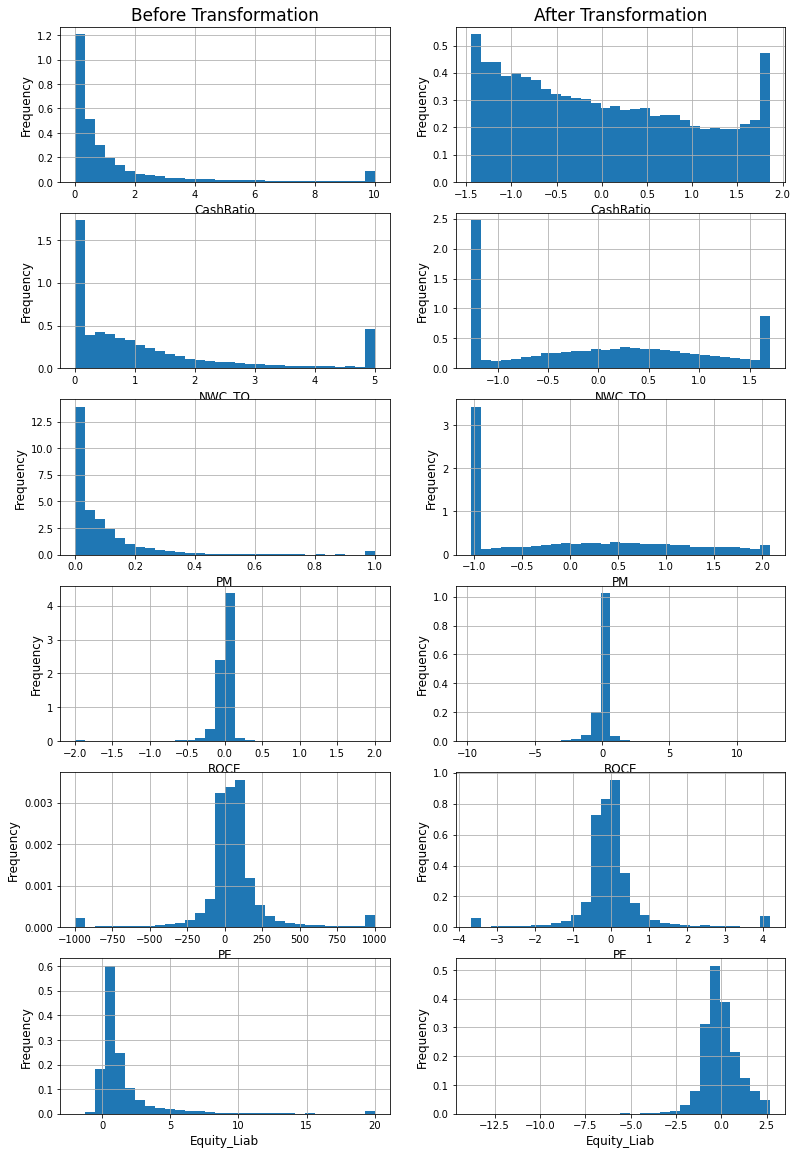

time: 3.12 s (started: 2022-10-13 14:16:50 +08:00)


In [23]:
# Visualise some features before and after transformation using indexing
plot_list = [2,5,6,9,10,17]

plt.figure(figsize=(13,20))
j=1

for i in plot_list:    
    # create subplots with number of rows, columns and index (starts with 1)
    plt.subplot(len(plot_list), 2, 2*j-1)
    plotFeatures(i, X)
    if j==1:
        plt.title('Before Transformation',fontsize=17)
    
    plt.subplot(len(plot_list), 2, 2*j)
    plotFeatures(i, X_transformed)
    if j==1:
        plt.title('After Transformation',fontsize=17)
    j+=1
    
plt.savefig('TransformedFeatures.png', dpi=300)

# Save files to csv

In [24]:
# X has not been power-transformed yet and will be done in the next step
X

,CR,Acid,CashRatio,InvTO,AssetTurnover,NWC_TO,PM,GPM,ROE,ROCE,...,EV_EBIT,DE,DebtRatio,ICR,Equity_Liab,WorkingCap,OI_NWCFA,WC_TA,RE_TA,EBIT_TA
0,3.846561,3.282540,2.422222,0.0,1.738654,0.413011,0.113411,0.529253,0.029675,0.019711,...,102.424000,0.835610,2.196731,11.437500,1.196731,3.846561,0.054971,0.345137,0.781242,0.017321
1,3.337925,2.831956,2.057851,0.0,1.633997,0.419089,0.157451,0.537957,0.039070,0.026095,...,87.073672,0.830698,2.203807,12.875000,1.203807,3.337925,0.064395,0.323425,-0.057546,0.022485
2,3.201348,2.739680,2.012637,0.0,1.632593,0.421737,0.148820,0.537205,0.037486,0.025772,...,100.519886,0.832229,2.201593,13.400000,1.201593,3.201348,0.061131,0.325973,-0.049027,0.021956
3,3.219984,2.763900,2.065270,0.0,1.555866,0.404356,0.157092,0.535009,0.037953,0.025641,...,106.568444,0.791585,2.263288,15.461538,1.263288,3.219984,0.057908,0.333495,-0.031473,0.021789
4,3.300871,2.845606,2.120348,0.0,1.570674,0.409153,0.148865,0.544155,0.036608,0.029736,...,100.863756,0.742709,2.346422,17.923077,1.346422,3.300871,0.063609,0.344885,-0.014954,0.025279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29645,4.124364,3.653242,2.640850,0.0,15.150000,0.836957,0.172040,0.808665,0.124024,0.123583,...,125.073550,0.508297,2.967355,-600.000000,1.967355,4.124364,0.167461,0.571065,0.461454,0.100995
29646,4.342120,3.884549,2.701559,0.0,16.505828,0.815361,0.208092,0.800805,0.149952,0.161135,...,68.140399,0.438813,3.278873,600.000000,2.278873,4.342120,0.204696,0.614245,0.507692,0.131520
29647,4.404868,3.817107,2.500000,0.0,13.645161,0.766613,0.192868,0.776661,0.126008,0.089455,...,143.162418,0.425348,3.351019,600.000000,2.351019,4.404868,0.117159,0.597917,0.520529,0.073746
29648,4.955648,4.173754,2.809967,0.0,13.838362,0.808928,0.156622,0.789181,0.111919,0.132568,...,190.693602,0.363616,3.750153,600.000000,2.750153,4.955648,0.162071,0.647814,0.552518,0.110857


time: 32 ms (started: 2022-10-13 14:16:53 +08:00)


In [25]:
# Just a dataframe of the tickers and the returns, without dates. Row indexing corresponds to X.
y

,Ticker,Returns
0,A,0.563351
1,A,0.535595
2,A,0.198018
3,A,0.076426
4,A,-0.050044
...,...,...
29645,ZYXI,0.772254
29646,ZYXI,0.701262
29647,ZYXI,0.400618
29648,ZYXI,-0.325537


time: 0 ns (started: 2022-10-13 14:16:53 +08:00)


In [26]:
pickle.dump(X, open('./data/03_finratios.pkl', 'wb'))
pickle.dump(y, open('./data/03_returns.pkl', 'wb'))

time: 16 ms (started: 2022-10-13 14:16:54 +08:00)


In [27]:
# save the final file to csv
X.to_csv("./data/03_finratios.csv")
y.to_csv("./data/03_returns.csv")

time: 750 ms (started: 2022-10-13 14:16:54 +08:00)


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CR             29650 non-null  float64
 1   Acid           29650 non-null  float64
 2   CashRatio      29650 non-null  float64
 3   InvTO          29650 non-null  float64
 4   AssetTurnover  29650 non-null  float64
 5   NWC_TO         29650 non-null  float64
 6   PM             29650 non-null  float64
 7   GPM            29650 non-null  float64
 8   ROE            29650 non-null  float64
 9   ROCE           29650 non-null  float64
 10  PE             29650 non-null  float64
 11  PB             29650 non-null  float64
 12  PS             29650 non-null  float64
 13  EV_EBIT        29650 non-null  float64
 14  DE             29650 non-null  float64
 15  DebtRatio      29650 non-null  float64
 16  ICR            29650 non-null  float64
 17  Equity_Liab    29650 non-null  float64
 18  Workin

In [29]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29650 entries, 0 to 29649
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ticker   29650 non-null  object
 1   Returns  29650 non-null  object
dtypes: object(2)
memory usage: 463.4+ KB
time: 15 ms (started: 2022-10-13 14:16:54 +08:00)
